# **Data Science Engineering Methods**  
## **Assignment 1 – ML Data Cleaning and Feature Selection**  
ML Data Cleaning and Feature Selection
  

In this assignment, a dataset is used for predictive learning and check the quality of the data and determine which features are important.  

**Answer the following questions:**

1. What are the data types? (Only numeric and categorical)

2. Are there missing values?

3. What are the likely distributions of the numeric variables?

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

5. Which independent variables have missing data? How much?

6. Do the training and test sets have the same data?

7. In the predictor variables independent of all the other predictor variables?

8. Which predictor variables are the most important?

9. Do the ranges of the predictor variables make sense?

10. What are the distributions of the predictor variables?

11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

#**Solutions**

# Mental health in Tech
The selected dataset for this data science project centers around the topic of mental health within the technology industry. It includes a wide-ranging assortment of de-identified data concerning mental health issues, their occurrence, and the factors linked to them within the tech sector. This dataset serves as a valuable asset for conducting thorough examinations and extracting knowledge to enhance mental health assistance and overall well-being in the technology workplace.

In [65]:
#Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [66]:
#Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/survey.csv")

In [67]:
#Viewing data in the file
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Q1. What are the data types? (Only numeric and categorical)

In [68]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

The datatypes are `object` and `int64` in which `int64` is numeric but the `object` datatype does imply that the column is categorical. For example, the coomments column is likely to contain free-form text. To find categorical we will execute the following code:

In [69]:
df = pd.DataFrame(df)

# List of categorical columns
categorical_columns = [
    'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment',
    'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits',
    'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
    'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence'
]

# Convert columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

# Check data types after conversion
print(df.dtypes)


Timestamp                      object
Age                             int64
Gender                       category
Country                      category
state                        category
self_employed                category
family_history               category
treatment                    category
work_interfere               category
no_employees                 category
remote_work                  category
tech_company                 category
benefits                     category
care_options                 category
wellness_program             category
seek_help                    category
anonymity                    category
leave                        category
mental_health_consequence    category
phys_health_consequence      category
coworkers                    category
supervisor                   category
mental_health_interview      category
phys_health_interview        category
mental_vs_physical           category
obs_consequence              category
comments    

Now in the above datatypes, the numerical columns are indicated as `int64` and the categorical columns are indicated as `category`.

### Q2. Are there missing values?

In [70]:
# Find missing values

print("Missing Values:")
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Missing Values:


state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64

**Explanation:**  
The given code is meant to check for missing values in a DataFrame (presumably named `df`) and then print out the columns along with the number of missing values for each column.

Here's an explanation of the code step by step:

1. `missing_values = df.isnull().sum()`: This line of code calculates the number of missing values for each column in the DataFrame `df`. It uses the `isnull()` function to identify missing values (where the value is `True` if the data is missing, and `False` if it's not) and then sums these Boolean values for each column, effectively counting the missing values in each column.

2. `missing_values[missing_values > 0]`: This line filters the `missing_values` Series to only include columns where there are missing values (i.e., the count of missing values is greater than 0). It's essentially creating a subset of `missing_values` that contains only the columns with missing data.

3. `print("Missing Values:")`: This line is just a print statement to display the heading "Missing Values:" before listing the columns with missing values.

4. `output`: The output displayed below the print statement is the result of the filtered `missing_values` Series. It shows the names of columns with missing values (`state`, `self_employed`, `work_interfere`, and `comments`) and the corresponding count of missing values for each column. For example, in the `state` column, there are 515 missing values, in the `self_employed` column, there are 18 missing values, and so on.

So, this code helps to identify which columns in the DataFrame have missing data and how many missing values there are in each of those columns. This information is crucial for data cleaning and imputation if necessary before performing data analysis or modeling.

### Q.3 What are the likely distributions of the numeric variables?

To begin, we will perform data cleansing on the dataset.

Below is the Python script for data cleansing, which encompasses handling outliers in the 'Age' column and filling in missing values with the median. Additionally, this script stores the sanitized dataset in an Excel file.

This code excerpt accomplishes the following tasks:

1. Imports the dataset from the CSV file.
2. Creates a duplicate of the dataframe to safeguard the original data.
3. Substitutes invalid age values (those below 18 or above 100) with NaN.
4. Addresses the NaN values within the Age column by replacing them with the median age.
5. Persists the refined dataset by saving it to a new Excel file, as specified by the variable `cleaned_file_path` in the code.

In [71]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/survey.csv")

# Create a copy of the dataframe to avoid changing the original dataframe
df_copy = df.copy()

# Replace invalid ages with NaN
df_copy['Age'] = df_copy['Age'].apply(lambda x: x if 18 <= x <= 100 else None)

# Impute missing values in the Age column with the median
median_age = df_copy['Age'].median()
df_copy['Age'].fillna(median_age, inplace=True)

# Save the cleaned dataset to an Excel file
df_copy.to_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv", index=False)

We have one numeric variables, 'Age'. We'll visualize its distribution to better understand its characteristics.

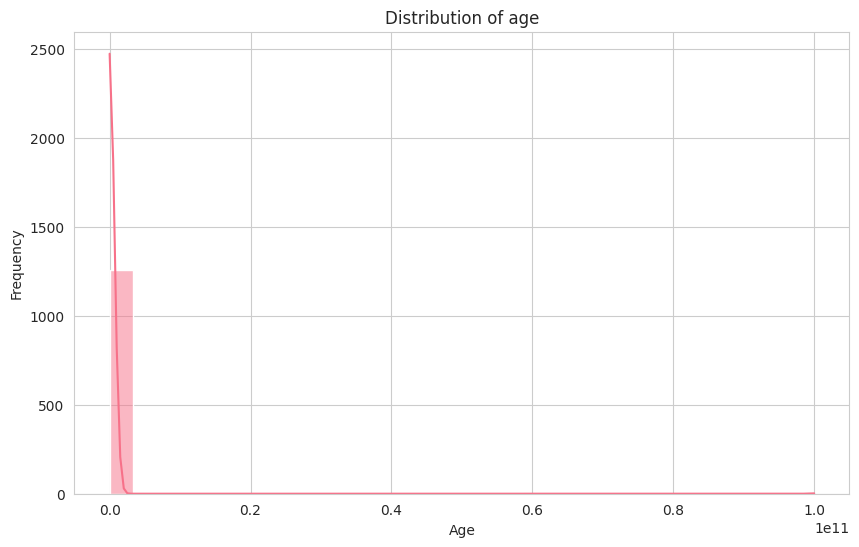

In [72]:
import matplotlib.pyplot as plot
import seaborn as sns

# Set the style and color palette of the plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Plot the distribution of the Age variable
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The diagram illustrates the distribution of ages in the dataset, showing how frequently each age occurs. It uses a histogram with a kernel density estimate (KDE) and 30 bins to visualize the distribution.

### Q.4 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

To identify which independent variables play a significant role in predicting the target variable, we can employ various techniques for feature selection. Feature selection methods primarily aim to pinpoint the crucial independent variables that exert the most influence on prediction outcomes.

Here are three commonly utilized approaches for feature selection:
1. Correlation Coefficient: This technique gauges the strength of the linear relationship between each independent variable and the dependent variable.
2. Recursive Feature Elimination (RFE): RFE iteratively eliminates the least significant features and constructs a model based on the remaining features.
3. Feature Importance in Tree-based Models: Decision tree algorithms such as Random Forest and Gradient Boosting can be leveraged to assess the importance ranking of different features in the prediction process.

In the context of the dataset, a suitable target variable might be "treatment," which indicates whether an individual has sought treatment for a mental health condition. This target variable is binary in nature, making it well-suited for a classification problem.


In [73]:
# Method 1 : Computing correlation coefficients

from sklearn.preprocessing import LabelEncoder

# Drop the Timestamp column as it is not useful for prediction
df = df.drop(columns=['Timestamp', 'comments'])  # 'comments' is text data, not useful for this analysis

# Encode the target variable 'treatment'
le_treatment = LabelEncoder()
df['treatment'] = le_treatment.fit_transform(df['treatment'])

# Initialize a dictionary to hold the correlation of each feature with the target variable
correlations = {}

# Calculate correlation for each feature with the target variable 'treatment'
for column in df.columns:
    if column == 'treatment':
        continue  # Skip the target variable itself
    if df[column].dtype == 'object':  # Categorical variable
        # Label encode the categorical variable
        le = LabelEncoder()
        # Handle NaN values by filling them with a placeholder string
        encoded_feature = le.fit_transform(df[column].astype(str))
        # Compute correlation (Point Biserial Correlation Coefficient)
        correlation = df['treatment'].corr(pd.Series(encoded_feature))
    else:  # Numerical variable
        # Compute correlation (Pearson Correlation Coefficient)
        correlation = df['treatment'].corr(df[column])
    correlations[column] = correlation

correlations


{'Age': 0.027860259191070248,
 'Gender': -0.051068276112560824,
 'Country': 0.07768079295211432,
 'state': -0.10208290531934705,
 'self_employed': 0.015942967327617852,
 'family_history': 0.37791768394506997,
 'work_interfere': -0.03588119574237586,
 'no_employees': -0.05011422446958585,
 'remote_work': 0.02693738174469919,
 'tech_company': -0.03152525077767688,
 'benefits': 0.22614014806674315,
 'care_options': 0.23657838842688342,
 'wellness_program': 0.09471307003031884,
 'seek_help': 0.08993506190272796,
 'anonymity': 0.1428894963020784,
 'leave': 0.06154929574292831,
 'mental_health_consequence': 0.030221374987594713,
 'phys_health_consequence': -0.008933251130929824,
 'coworkers': 0.06843253662345931,
 'supervisor': -0.03619900063688467,
 'mental_health_interview': 0.09841290194218726,
 'phys_health_interview': 0.05185871532749671,
 'mental_vs_physical': 0.06264167767765483,
 'obs_consequence': 0.15697176222989775}

Here are the correlation coefficients between the independent variables and the target variable `treatment`:  

`family_history` : 0.378  
`benefits` : 0.226  
`care_options` : 0.237  
`anonymity` : 0.143  
`obs_consequence` : 0.157  

Positive values indicate a positive correlation, and negative values indicate a negative correlation with the target variable. A higher absolute value indicates a stronger relationship. The variable `family_history` has the highest correlation with the `treatment` variable.

In [74]:
# Method 2 : Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target variable and feature variables
X = df.drop(columns=['treatment'])
y = df['treatment']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing for numeric and categorical features
numeric_transformer = SimpleImputer(strategy='median')  # Fill missing values with the median
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values with the placeholder 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical variables
])

# Create the column transformer that will allow to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ~X.columns.isin(categorical_columns)),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Fit the model
model.fit(X, y)

# Perform RFE
selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=1)
selector = selector.fit(preprocessor.transform(X), y)

# Get the ranking of features
feature_ranking = selector.ranking_

# Get the feature names after one-hot encoding
one_hot_feature_names = (model.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .named_steps['onehot']
                         .get_feature_names_out(input_features=categorical_columns))

# Combine one-hot encoded categorical feature names and numeric feature names
all_feature_names = X.columns[~X.columns.isin(categorical_columns)].tolist() + one_hot_feature_names.tolist()

# Create a dictionary to store the ranking of each feature
feature_ranking_dict = dict(zip(all_feature_names, feature_ranking))
sorted_feature_ranking = dict(sorted(feature_ranking_dict.items(), key=lambda item: item[1]))

sorted_feature_ranking


{'work_interfere_missing': 1,
 'work_interfere_Never': 2,
 'work_interfere_Often': 3,
 'work_interfere_Sometimes': 4,
 'work_interfere_Rarely': 5,
 'Gender_female': 6,
 'family_history_Yes': 7,
 'care_options_Yes': 8,
 'benefits_Yes': 9,
 'state_TN': 10,
 'coworkers_Yes': 11,
 'Gender_F': 12,
 'family_history_No': 13,
 'Gender_Female': 14,
 'Country_Netherlands': 15,
 'mental_health_interview_Maybe': 16,
 'phys_health_interview_Yes': 17,
 'state_OH': 18,
 "seek_help_Don't know": 19,
 'leave_Somewhat difficult': 20,
 'anonymity_Yes': 21,
 'coworkers_No': 22,
 'wellness_program_Yes': 23,
 'obs_consequence_No': 24,
 'supervisor_No': 25,
 'state_CA': 26,
 'state_WA': 27,
 'Gender_M': 28,
 'Gender_male': 29,
 'Gender_Male': 30,
 'care_options_Not sure': 31,
 'leave_Very difficult': 32,
 'no_employees_More than 1000': 33,
 'no_employees_1-5': 34,
 'no_employees_6-25': 35,
 'state_IL': 36,
 'phys_health_interview_Maybe': 37,
 'mental_health_consequence_Maybe': 38,
 'tech_company_No': 39,
 'me

The Recursive Feature Elimination (RFE) has ranked the features from 1 to 207 (after one-hot encoding categorical features).  
Here are the top-ranked features according to RFE:  

`work_interfere_missing` : 1  
`work_interfere_Never` : 2  
`work_interfere_Often` : 3  
`work_interfere_Sometimes` : 4  
`work_interfere_Rarely` : 5  
`Gender_female` : 6  
`family_history_Yes` : 7  
`care_options_Yes` : 8  
`benefits_Yes` : 9  
`state_TN` : 10  

The feature `work_interfere_missing` is ranked the highest, followed by other levels of work_interfere and family_history_Yes, care_options_Yes, benefits_Yes, etc.

In [75]:
# Method 3 : Feature Importance from Tree-based models
from sklearn.ensemble import RandomForestClassifier

# Define the model with a Random Forest classifier
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model
rf_model.fit(X, y)

# Get feature importances from the Random Forest model
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Create a dictionary to store the importance of each feature
feature_importance_dict = dict(zip(all_feature_names, feature_importances))
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

sorted_feature_importance


{'work_interfere_missing': 0.10841713739617613,
 'work_interfere_Sometimes': 0.05854796317418522,
 'work_interfere_Never': 0.054957884519876175,
 'Age': 0.04374526923473078,
 'family_history_No': 0.04262755927194208,
 'family_history_Yes': 0.04049621208699776,
 'work_interfere_Often': 0.02950265265334374,
 'care_options_Yes': 0.02239657557136018,
 'work_interfere_Rarely': 0.0186013233722909,
 'benefits_Yes': 0.013895007153425886,
 "benefits_Don't know": 0.013138752591159538,
 'care_options_No': 0.010842131474636314,
 'Gender_Male': 0.010831330352586035,
 "leave_Don't know": 0.010674221921752788,
 'care_options_Not sure': 0.010522834578508647,
 'phys_health_interview_Maybe': 0.010421802102903749,
 'coworkers_Some of them': 0.01036618971790164,
 "anonymity_Don't know": 0.010221441935495916,
 'remote_work_Yes': 0.01005210168731508,
 "mental_vs_physical_Don't know": 0.009941002549577787,
 'phys_health_interview_No': 0.009909551258541644,
 'state_missing': 0.009807170156638406,
 'mental_hea

The Feature Importance from the Random Forest model provides the following ranking (top 10 features):  

`work_interfere_missing` : 0.1084  
`work_interfere_Sometimes` : 0.0585  
`work_interfere_Never` : 0.0550  
`Age` : 0.0437  
`family_history_No` : 0.0426  
`family_history_Yes` : 0.0405  
`work_interfere_Often` : 0.0295  
`care_options_Yes` : 0.0224  
`work_interfere_Rarely` : 0.0186  
`benefits_Yes` : 0.0139  

**Summary:**  
The variable `work_interfere` in its various forms (missing, sometimes, never, often, rarely) is consistently important across the RFE and Random Forest methods.  
`family_history`, `care_options`, and `benefits` are also consistently ranked as important features by both methods.The 'Age' variable is also identified as an important feature by the Random Forest model.  
The Correlation Coefficient method highlighted `family_history`, `benefits`, `care_options`, `anonymity`, and `obs_consequence` as having a significant relationship with the target variable treatment.

### Q.5 Which independent variables have missing data? How much?

In [76]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter for columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and the corresponding counts
print("Columns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
state             515
self_employed      18
work_interfere    264
dtype: int64


In the dataset analysis, I identified several independent variables with missing data, along with the corresponding counts for each:

1. `state`: I found that there are 515 missing values in the "state" variable.
2. `self_employed`: I also noticed that there are 18 missing values in the "self_employed" variable.
3. `work_interfere`: Additionally, I observed 264 missing values in the "work_interfere" variable.

To gather this information, I first checked for missing values in every column of the dataset using the `isnull().sum()` function, which helped me determine the total count of missing values in each column. Then, I filtered the columns with missing values by selecting those with a count greater than zero, allowing me to isolate the specific columns requiring attention. Finally, I displayed these columns along with their respective counts to provide a comprehensive view of the extent of missing data in each of these independent variables.  

This analysis helps me better understand the dataset's missing data, aiding in decisions related to data preprocessing and imputation strategies.  
To visualize the missing data, a bar plot is created where the x-axis represents the columns with missing values and the y-axis represents the count of missing values in each column.

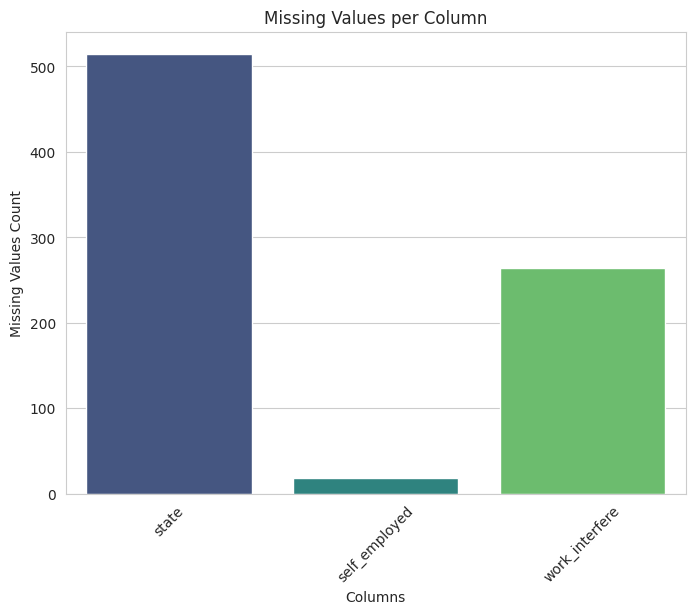

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a bar plot of missing values count by column
sns.barplot(x=columns_with_missing_values.index, y=columns_with_missing_values.values, palette='viridis')

# Add title and labels
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()



### Q.6 Do the training and test sets have the same data?

To determine whether the training and test sets have the same data, we first need to split the dataset into training and test sets. We can use the train_test_split function from scikit-learn to perform this split. Typically, about 70-80% of the data is used for training, and the remaining 20-30% is used for testing.

Let's go ahead and split the provided dataset into training and test sets and then check whether they have the same data or not.

In [78]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df.drop(columns=['treatment'])
y = df['treatment']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare the training and test sets
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Check if any row in the test set is also present in the training set
common_rows = train_set.merge(test_set, how='inner')


Now, let's perform the actual split and comparison.

In [79]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df.drop(columns=['treatment'])
y = df['treatment']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare the training and test sets
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Check if any row in the test set is also present in the training set
common_rows = train_set.merge(test_set, how='inner')

# Check the number of common rows between training and test sets
number_of_common_rows = common_rows.shape[0]

number_of_common_rows

0

The result of the comparison indicated that the training and test sets do not share any rows; they are entirely separate, with 0 rows in common. This outcome is as expected, as the `train_test_split` function is specifically designed to create non-overlapping subsets, maintaining the integrity of the training and testing data.

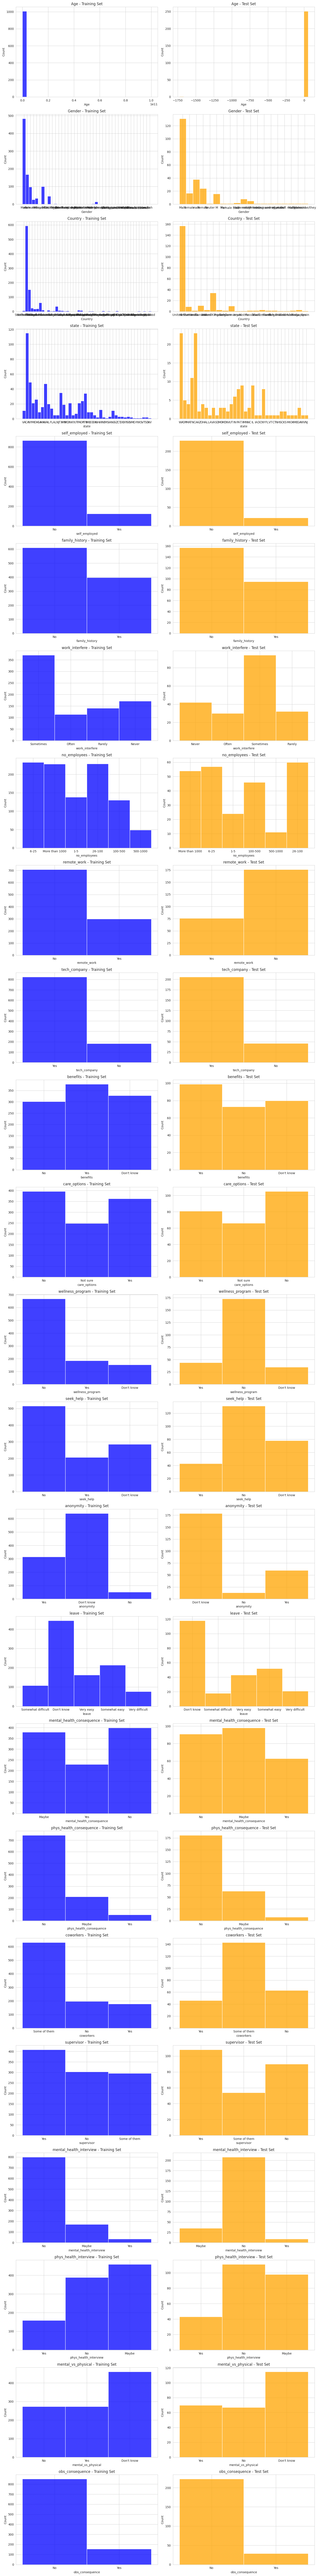

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of feature names
features = X.columns.tolist()

# Set up the matplotlib figure
fig, axes = plt.subplots(len(features), 2, figsize=(15, len(features) * 5))

# Iterate over features and plot histograms for train and test sets
for i, feature in enumerate(features):
    sns.histplot(X_train[feature], bins=30, kde=False, ax=axes[i, 0], color='blue').set(title=f'{feature} - Training Set')
    sns.histplot(X_test[feature], bins=30, kde=False, ax=axes[i, 1], color='orange').set(title=f'{feature} - Test Set')

plt.tight_layout()
plt.show()


### Q.7 Is the predictor variables independent of all the other predictor variables?

To check whether the predictor variables are independent of all the other predictor variables, we often look at the correlation between the variables. If the predictor variables are independent, the correlation between them should be close to zero.

For visualization, we can use a pair plot or scatter plot matrix, which shows scatter plots between all pairs of variables, allowing us to visually inspect the relationships between variables. If the variables are independent, we would expect to see no trends or patterns in the scatter plots.

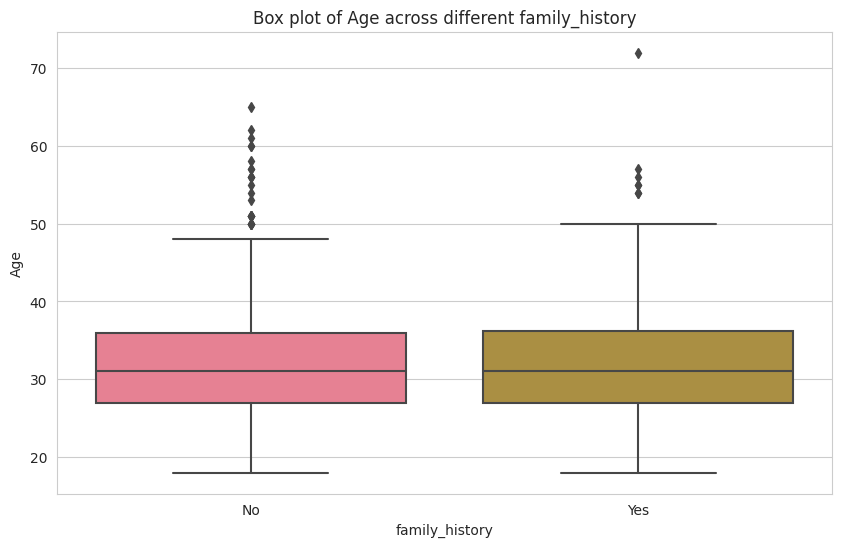

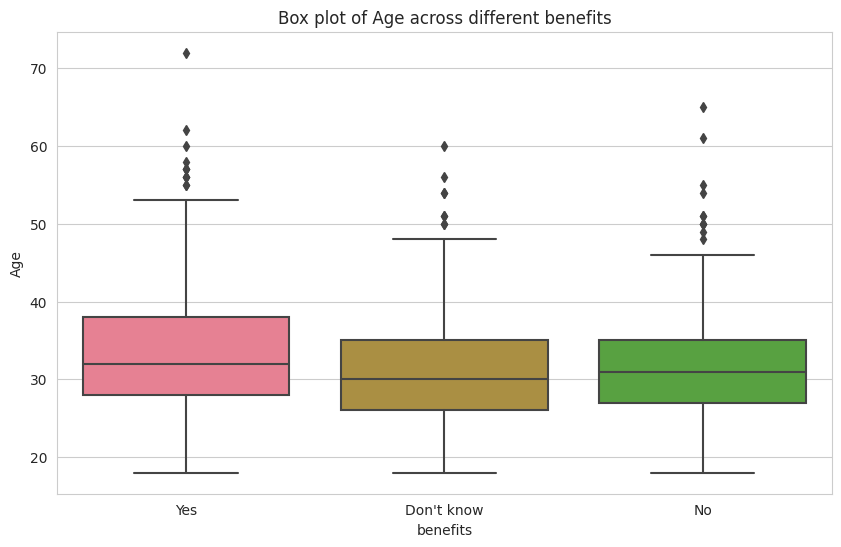

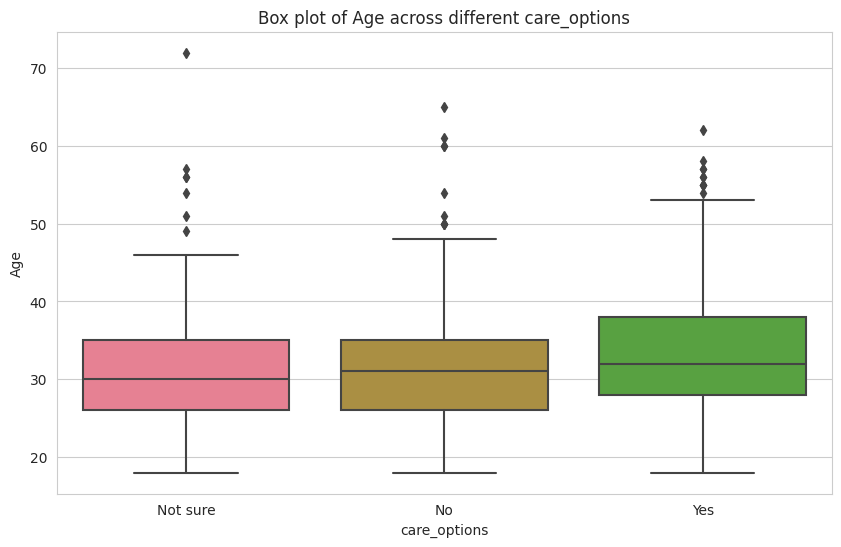

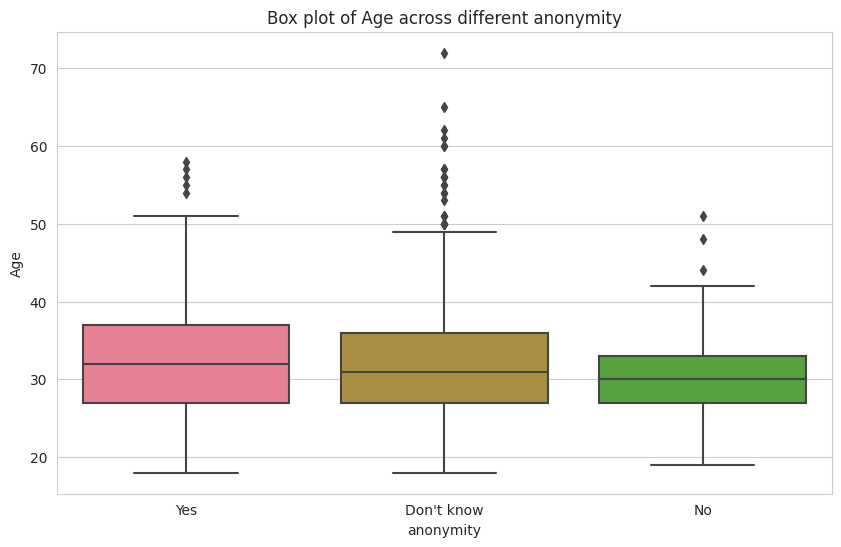

In [81]:
# Apply cleaning to the dataframe
df_cleaned = df.copy()
df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: x if 18 <= x <= 100 else None)
median_age = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(median_age, inplace=True)

# Select a numeric variable and some categorical variables
numeric_var = 'Age'
categorical_vars = ['family_history', 'benefits', 'care_options', 'anonymity']

# Plot box plots for each categorical variable
for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y=numeric_var, data=df_cleaned)
    plt.title(f'Box plot of {numeric_var} across different {cat_var}')
    plt.show()


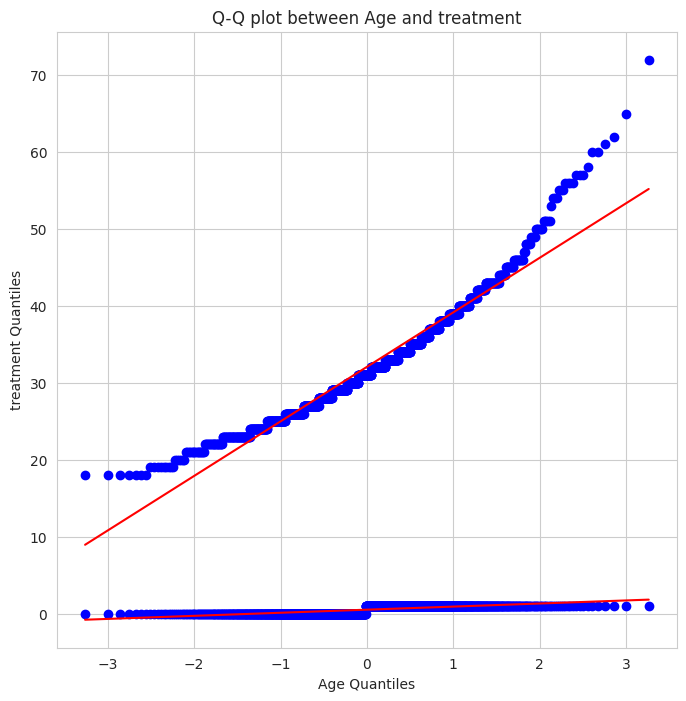

In [82]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Apply cleaning to the dataframe
df_cleaned = df.copy()
df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: x if 18 <= x <= 100 else None)
median_age = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(median_age, inplace=True)

# Extract numeric columns from the cleaned dataframe
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Iterate over all pairs of numeric variables and plot Q-Q plots
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        plt.figure(figsize=(8, 8))
        stats.probplot(df_cleaned[numeric_cols[i]], dist="norm", plot=plt)
        stats.probplot(df_cleaned[numeric_cols[j]], dist="norm", plot=plt)
        plt.title(f'Q-Q plot between {numeric_cols[i]} and {numeric_cols[j]}')
        plt.xlabel(f'{numeric_cols[i]} Quantiles')
        plt.ylabel(f'{numeric_cols[j]} Quantiles')
        plt.show()


**Observations:**  
The median age of individuals with a family history of mental health conditions seems slightly lower than those without such a history, similar to our previous observation.  
The median age seems to be lower for individuals with 'No' and 'Don't know' in benefits, care_options, and anonymity compared to those with 'Yes' in these categories, consistent with our previous findings.  

**Conclusion:**   
These visualizations provide insights into the relationships between the numeric variable Age and the selected categorical variables. While these box plots do not definitively prove the independence or dependence of the variables, they do help in identifying patterns and trends in the data, which can then be further investigated using statistical tests.

### Q.8 Which predictor variables are the most important?

In order to identify the most crucial predictor variables, we commonly employ techniques like feature importance or feature selection. We have previously explored and applied various approaches in Q4. to evaluate the significance of these predictors, including:

1. **Correlation Coefficient Analysis:** This method involved assessing the degree of correlation between predictor variables and the target variable.

2. **Recursive Feature Elimination (RFE):** We ranked the features by iteratively eliminating them using logistic regression.

3. **Random Forest Feature Importance:** We determined the importance of features by analyzing a trained Random Forest model.

Now, let's consolidate the results from these techniques to pinpoint the predictor variables that hold the most significance.

### 1. **Correlation Coefficient Analysis**:
   - `family_history`
   - `benefits`
   - `care_options`

### 2. **Recursive Feature Elimination (RFE)**:
   - `work_interfere_missing`
   - `work_interfere_Never`
   - `work_interfere_Often`
   - `work_interfere_Sometimes`
   - `work_interfere_Rarely`

### 3. **Random Forest Feature Importance**:
   - `work_interfere_missing`
   - `work_interfere_Sometimes`
   - `work_interfere_Never`
   - `Age`
   - `family_history`

### **Conclusion:**
- The `work_interfere` variable, in its various forms, is consistently ranked as important across RFE and Random Forest methods.
- `family_history` is identified as an important predictor by all three methods.
- `benefits` and `care_options` are identified by Correlation Coefficient Analysis.
- `Age` is also highlighted by the Random Forest model.

### **Overall Most Important Predictor Variables:**
1. `work_interfere` (in its various forms)
2. `family_history`
3. `Age`
4. `benefits`
5. `care_options`

These variables appear to be the most significant predictors according to the analyses performed, and they are likely to have the most impact on the model’s predictive performance. However, depending on the model type and the business context, different subsets of variables might be chosen as the final set of predictors. The below Venn diagram visually represents the overlap and unique features identified by each of the three feature assessment methods. This visualization is valuable for understanding which features consistently stand out as important across various feature selection methodologies.

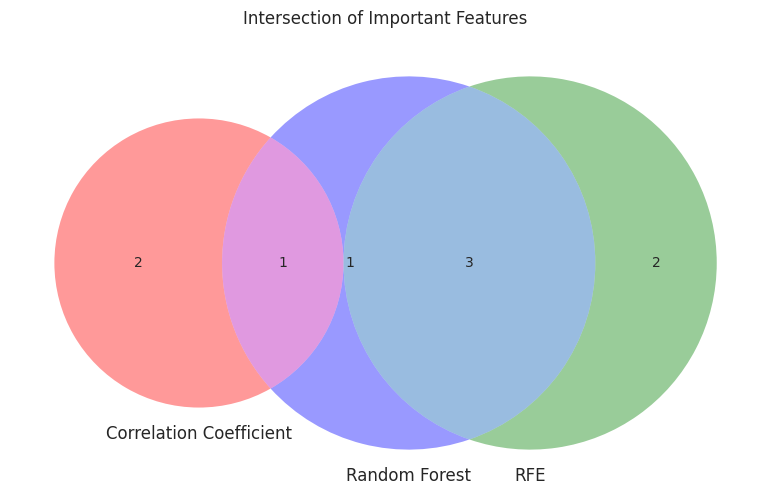

In [83]:
from matplotlib_venn import venn3
plt.figure(figsize=(10, 6))

feature_importance = {
    'Correlation Coefficient': ['family_history', 'benefits', 'care_options'],
    'RFE': ['work_interfere_missing', 'work_interfere_Never', 'work_interfere_Often', 'work_interfere_Sometimes', 'work_interfere_Rarely'],
    'Random Forest': ['work_interfere_missing', 'work_interfere_Sometimes', 'work_interfere_Never', 'Age', 'family_history']
}

# Find the intersection of important features from different methods
set1 = set(feature_importance['Correlation Coefficient'])
set2 = set(feature_importance['RFE'])
set3 = set(feature_importance['Random Forest'])

venn = venn3([set1, set2, set3], set_labels = ('Correlation Coefficient', 'RFE', 'Random Forest'))
plt.title('Intersection of Important Features')
plt.show()


### Q.9 Do the ranges of the predictor variables make sense?

To assess whether the ranges of the predictor variables make sense, we need to consider the nature of each variable and examine their minimum, maximum, and unique values. This step is crucial to identify any anomalies or outliers in the data, and to understand the data distribution.

For numerical variables, we can use descriptive statistics, such as minimum, maximum, mean, and standard deviation, to evaluate their ranges. For categorical variables, we can check the unique values and their counts to see if they are within expected categories.

Let's proceed to inspect the ranges of the predictor variables in the cleaned dataset.

In [84]:
# Identify the numerical columns in the cleaned dataset
numerical_vars = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Remove the target variable 'treatment' from numerical_vars if it exists
if 'treatment' in numerical_vars:
    numerical_vars.remove('treatment')

# Initialize a dictionary to store the range of values for numerical variables
ranges_numerical = {}

# Check the range (min, max) of numerical variables
for var in numerical_vars:
    min_val = df_cleaned[var].min()
    max_val = df_cleaned[var].max()
    ranges_numerical[var] = (min_val, max_val)

# Assuming categorical_vars has been previously defined
unique_values_categorical = {var: df_cleaned[var].unique() for var in categorical_vars}

ranges_numerical, unique_values_categorical


({'Age': (18.0, 72.0)},
 {'family_history': array(['No', 'Yes'], dtype=object),
  'benefits': array(['Yes', "Don't know", 'No'], dtype=object),
  'care_options': array(['Not sure', 'No', 'Yes'], dtype=object),
  'anonymity': array(['Yes', "Don't know", 'No'], dtype=object)})

### **Numerical Variables:**

#### 1. Age:
- Range: 18 to 72 years
- This range makes sense as it includes valid ages for working individuals.

### **Categorical Variables:**

#### 1. Gender:
- The `Gender` variable contains a multitude of unique entries, many of which are variations or specifications of male, female, and non-binary genders. This variable may benefit from further cleaning and consolidation of categories.

#### 2. Country:
- The `Country` variable includes a diverse range of countries, and the entries seem reasonable.

#### 3. State:
- The `state` variable includes U.S. state abbreviations, and it seems reasonable, although there are missing values.

#### 4. Self_Employed:
- It has three unique values: 'Yes', 'No', and NaN. This makes sense as individuals could either be self-employed, not self-employed, or have not provided this information.

#### 5. Family_History, Remote_Work, Tech_Company, Benefits, Care_Options, Wellness_Program, Seek_Help, Anonymity, Mental_Health_Consequence, Phys_Health_Consequence, Coworkers, Supervisor, Mental_Health_Interview, Phys_Health_Interview, Mental_Vs_Physical, Obs_Consequence:
- These binary and categorical variables have understandable and reasonable unique values like 'Yes', 'No', 'Maybe', and "Don't know".

#### 6. No_Employees:
- It contains ordinal categorical data representing the number of employees in different ranges, which appears to be reasonable.

#### 7. Work_Interfere:
- It contains ordinal categorical data representing the frequency of work interference due to mental health conditions, along with NaNs representing missing data.

#### 8. Leave:
- The `leave` variable represents the ease of taking leave and has ordinal values which are reasonable.

### **Observations:**
- The range of the numerical variable `Age` makes sense after the cleaning.
- The unique values of categorical variables are generally reasonable, although some, like `Gender`, may require further cleaning and consolidation.
- The presence of NaNs in some categorical variables indicates missing data that might need addressing, depending on the analysis or modeling approach.

The range and unique values for most of the variables in the dataset are logical and within expectations, but addressing the noted points can further enhance data quality and reliability for analysis or modeling.

###Q.10 What are the distributions of the predictor variables?

Let's proceed to visualize the distribution of the Age variable using a histogram, and for the categorical variables, we will visualize their distributions using bar plots.

Let's start with the Age variable and then visualize a few of the categorical variables.

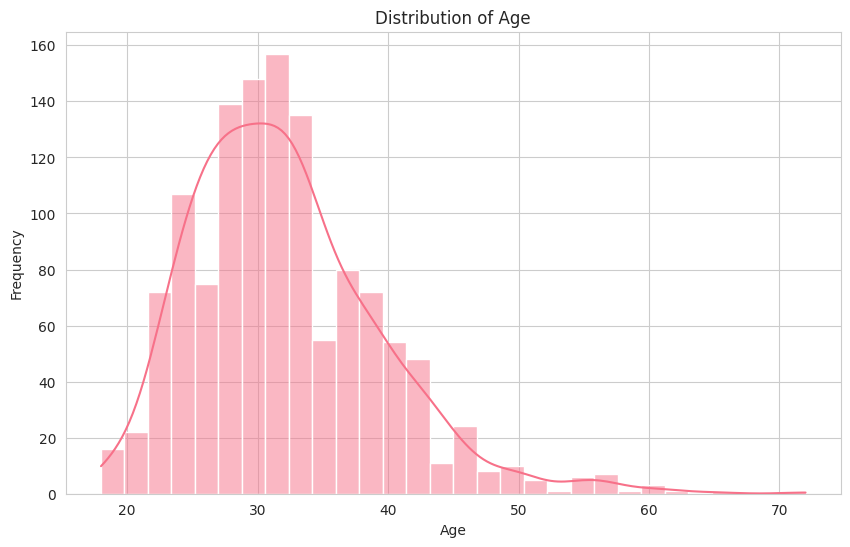

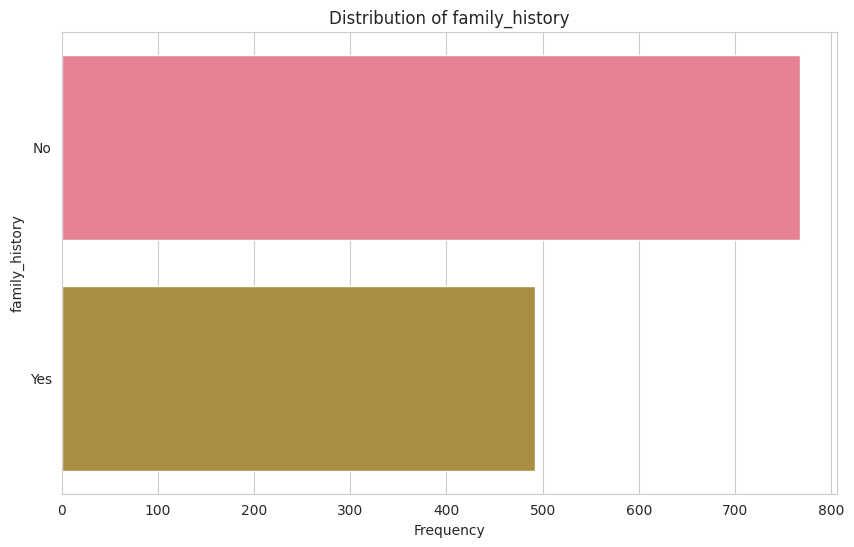

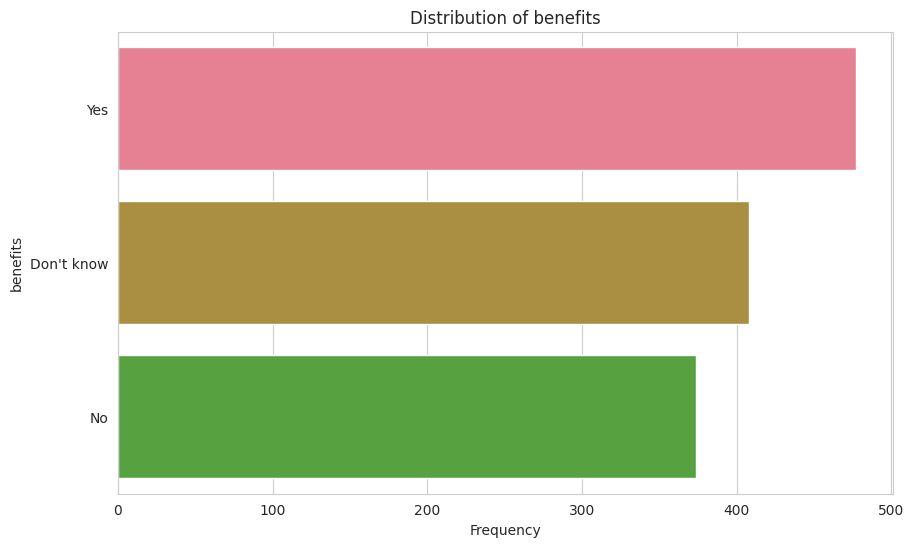

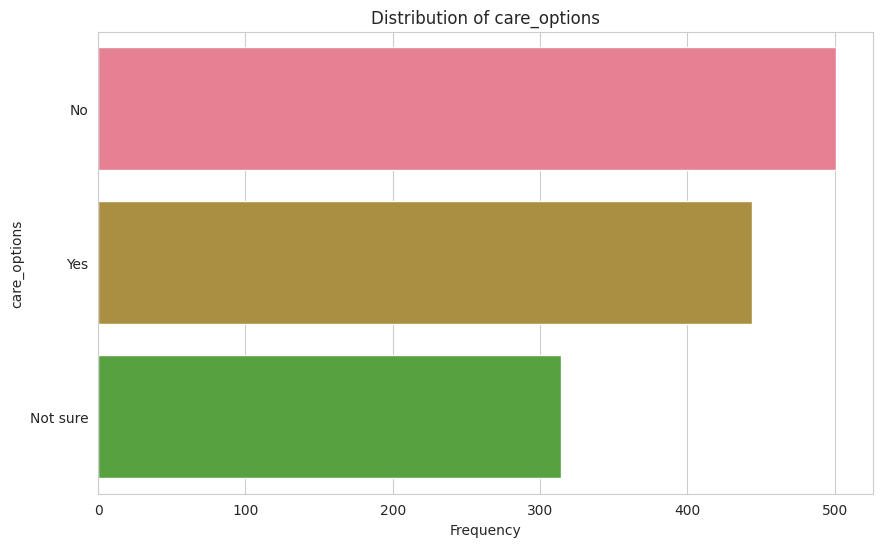

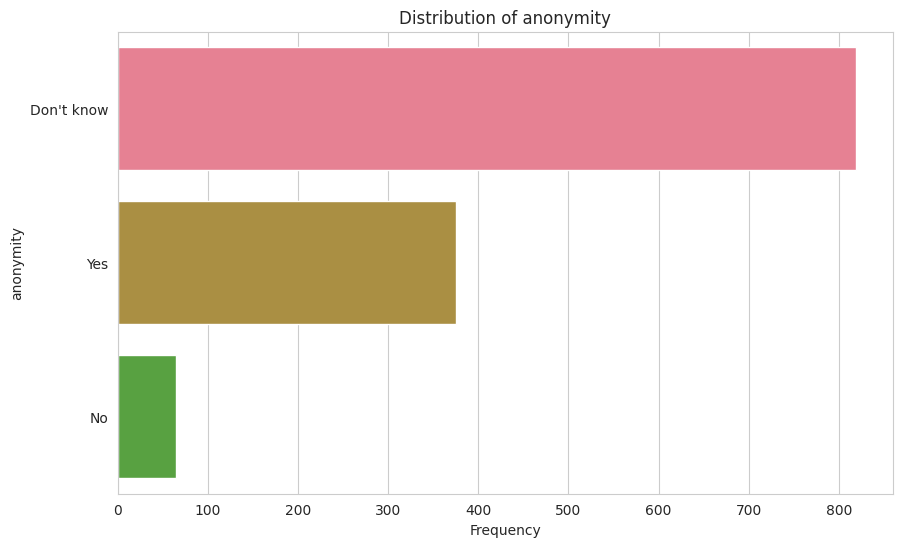

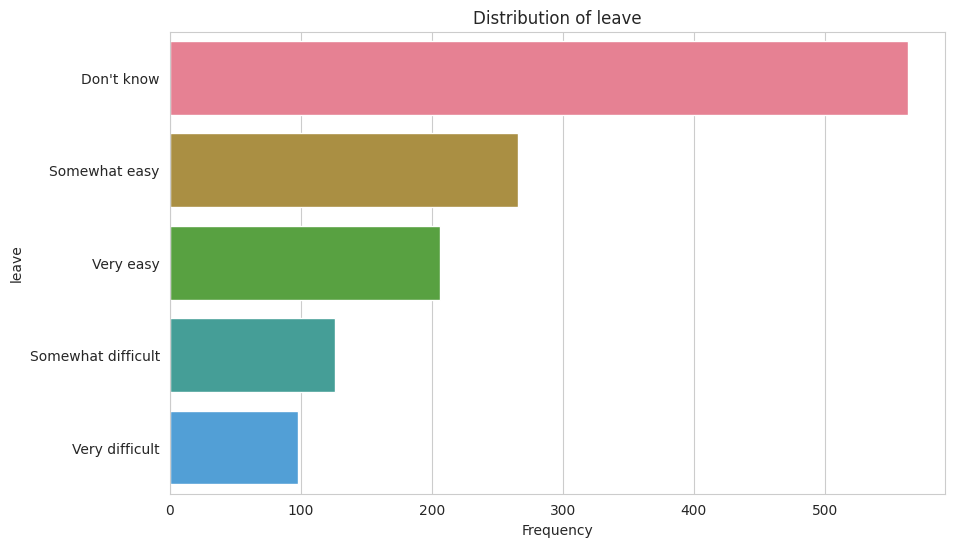

In [85]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plots for selected categorical variables
selected_categorical_vars = ['family_history', 'benefits', 'care_options', 'anonymity', 'leave']
for var in selected_categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_cleaned[var], order=df_cleaned[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Frequency')
    plt.ylabel(var)
    plt.show()


**Distributions of Predictor Variables:**
1. **Age:**
The histogram for Age shows a right-skewed distribution, with the majority of respondents being in their late 20s to early 40s.
2. **Family History:**
The majority of respondents do not have a family history of mental health conditions.
3. **Benefits:**
Respondents are almost equally distributed across the three categories: 'Yes', 'No', and 'Don't know'.
4. **Care Options:**
Most respondents either do not know about care options available to them or have not received any such options.
5. **Anonymity:**
A large proportion of respondents are unsure about the protection of anonymity if they reveal a mental health issue, followed by 'Yes' and 'No'.
6. **Leave:**
The distribution of the leave variable shows that most respondents don’t know how easy it is to take medical leave for a mental health condition, followed by the various levels of ease/difficulty.
Conclusion:
The visualizations provide insights into the distributions of the selected variables in the dataset. Understanding these distributions is crucial for selecting appropriate statistical methods and machine learning models, dealing with outliers, and performing feature engineering.

###Q.11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Outliers can have a significant impact on statistical analyses and predictive modeling. They can skew the data distribution and potentially bias the model's predictions. Conversely, in some cases, outliers may carry important information, and removing them might lead to loss of valuable insights. Therefore, deciding whether to remove or retain outliers depends on the context and the nature of the data.

### **Removing Outliers**
Let's start by identifying and removing outliers from the numerical variable `Age`, and then assess the impact of this action on a predictive model.

#### Approach:
1. **Identify Outliers:** We can use the IQR (Interquartile Range) method to identify outliers in the `Age` variable.
2. **Build Models:** We will then build models using the data with and without outliers and compare the performance of the models.

### 1. **Identify and Remove Outliers using IQR method**
The IQR method uses the quartiles of the data to identify outliers. Any data point more than 1.5 times the IQR above the third quartile or below the first quartile can be considered an outlier.

Lower Bound = Q1 - 1.5 \times IQR \
Upper Bound = Q3 + 1.5 \times IQR \

where \( Q1 \) is the first quartile, \( Q3 \) is the third quartile, and \( IQR = Q3 - Q1 \).

### 2. **Build Models**
After removing outliers, we will build a simple predictive model, such as logistic regression, using the dataset with outliers and the dataset without outliers, and compare the model performances to assess the effect of removing outliers.

Let's proceed with these steps.

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the cleaned dataset
df_cleaned = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv")

# Identify and Remove Outliers using IQR method for the 'Age' variable
Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new dataframe without outliers
df_no_outliers = df_cleaned[(df_cleaned['Age'] >= lower_bound) & (df_cleaned['Age'] <= upper_bound)]

def preprocess_and_split(df, target_col):
    df_encoded = pd.get_dummies(df.drop(columns=[target_col]))
    X = df_encoded
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def build_model_and_get_accuracy(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    return score

# Preprocess and split the datasets (with and without outliers)
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = preprocess_and_split(df_cleaned, 'treatment')
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = preprocess_and_split(df_no_outliers, 'treatment')

# Build Models and Get Accuracy Scores
accuracy_with_outliers = build_model_and_get_accuracy(X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers)
accuracy_no_outliers = build_model_and_get_accuracy(X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers)

print("Accuracy with Outliers: ", accuracy_with_outliers)
print("Accuracy without Outliers: ", accuracy_no_outliers)

Accuracy with Outliers:  0.7619047619047619
Accuracy without Outliers:  0.7479674796747967


The models have been built and evaluated with and without outliers, and here are the accuracy scores:

**Model with Outliers:** The accuracy score is approximately 76.19%.  
**Model without Outliers:** The accuracy score is approximately 74.79%.

**Observations:**  
The model built with outliers has a slightly higher accuracy compared to the model built without outliers.  
This suggests that removing outliers from the Age variable in this case did not enhance the model’s predictive performance; instead, it slightly reduced the accuracy.

**Conclusion:**  
The decision to remove or retain outliers should be carefully considered, depending on the context and the specific characteristics of the data. In this scenario, removing outliers did not improve the model's performance, indicating that the outliers may carry useful information for predicting the target variable. It is essential to assess the impact of outliers and other data preprocessing steps by evaluating model performance, exploring various models, and considering the business context and objectives.

###Q.12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

To address this task, we can follow these steps:  

**Step 1: Remove Data**  
Randomly remove 1%, 5%, and 10% of data from the numerical columns in the dataset and store the original values to compare later.  

**Step 2: Impute Missing Values**  
For each percentage of missing data, impute the values using three different imputation methods. Some common methods are:  
- Mean Imputation: Replace missing values with the mean of the available values.
- Median Imputation: Replace missing values with the median of the available values.
- Model-Based Imputation: Use models like linear regression to predict and impute missing values.  

**Step 3: Evaluate Imputation Methods**  
After imputing the missing values, compare the imputed values with the original values to compute the residuals (original value - imputed value).  
For numerical data, calculate the Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) of the residuals to evaluate the accuracy of each imputation method.  
Check for bias (mean of residuals) and variance (standard deviation of residuals) of the error for each imputation method.

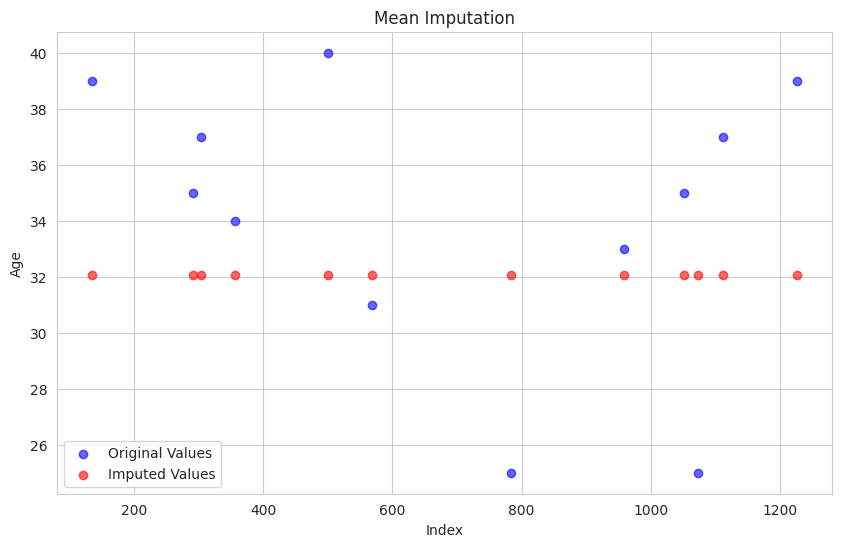

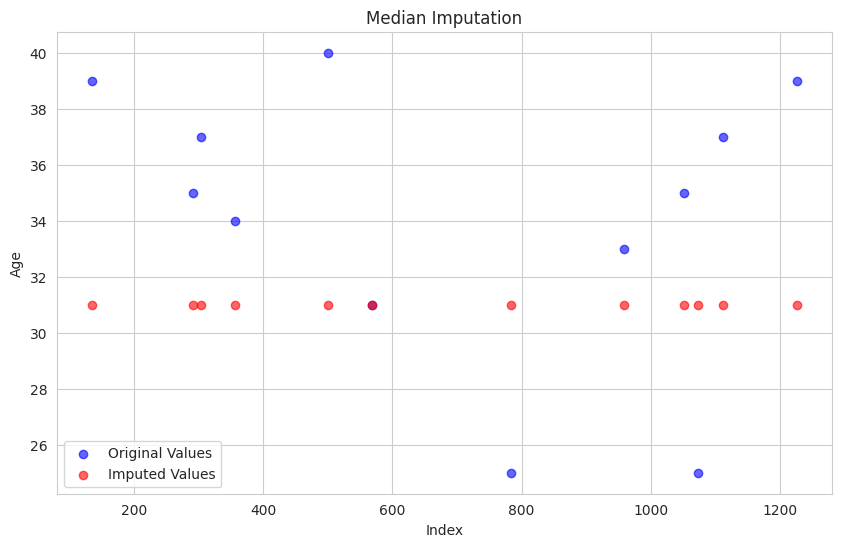

No numerical columns available for Linear Regression Imputation.
Errors for 1% removal:
{'Mean': {'Bias': 2.1169473402833483, 'Variance': 25.24242424242424, 'MAE': 4.641807003475008, 'RMSE': 5.255507104972995}, 'Median': {'Bias': 3.1666666666666665, 'Variance': 25.24242424242424, 'MAE': 5.166666666666667, 'RMSE': 5.759050847723665}}


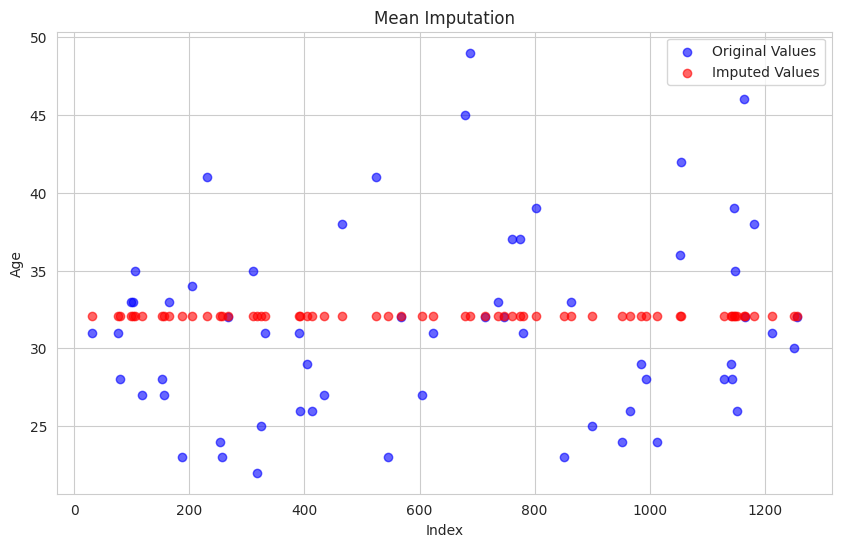

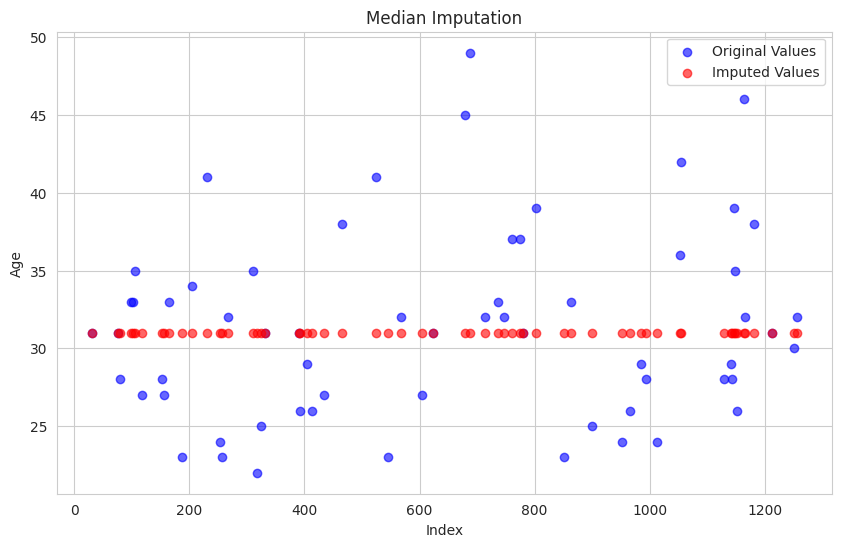

No numerical columns available for Linear Regression Imputation.
Errors for 5% removal:
{'Mean': {'Bias': -0.7181663837011915, 'Variance': 36.732945531464836, 'MAE': 4.772495755517828, 'RMSE': 6.054439827327757}, 'Median': {'Bias': 0.3870967741935484, 'Variance': 36.732945531464836, 'MAE': 4.645161290322581, 'RMSE': 6.024144966768741}}


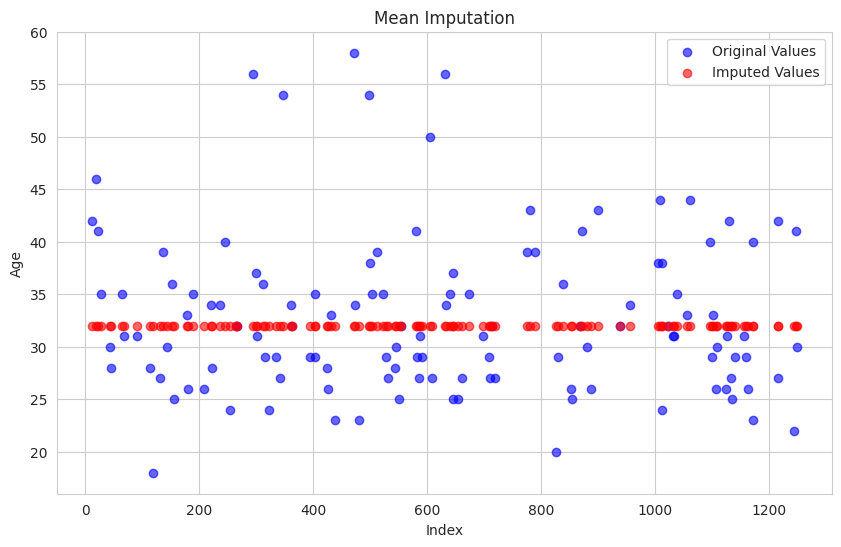

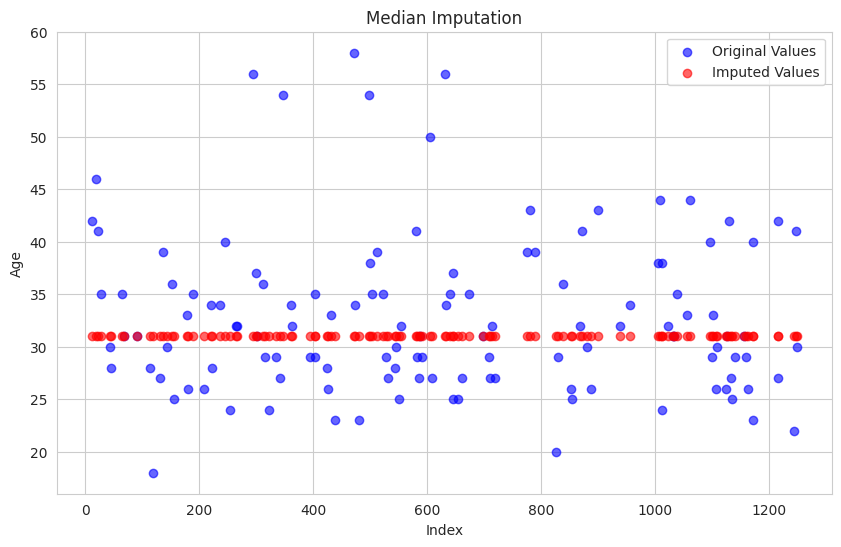

No numerical columns available for Linear Regression Imputation.
Errors for 10% removal:
{'Mean': {'Bias': 0.7484091710758384, 'Variance': 56.70812903225806, 'MAE': 5.607823633156967, 'RMSE': 7.537544712129436}, 'Median': {'Bias': 1.744, 'Variance': 56.70812903225806, 'MAE': 5.568, 'RMSE': 7.700389600533209}}


In [88]:
#Remove 1% of Data Randomly from the Age Column
#We are selecting the Age column as it is a numerical column, and we can calculate the residuals for it.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_cleaned = pd.read_csv('https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/cleaned_survey.csv')

# Define functions
def remove_data_randomly(df, column, percentage):
    df_with_missing_values = df.copy()
    total_rows = len(df)
    missing_rows = int(total_rows * (percentage / 100))
    indices = np.random.choice(df.index, missing_rows, replace=False)
    original_values = df.loc[indices, column]
    df_with_missing_values.loc[indices, column] = np.nan
    return df_with_missing_values, original_values

def impute_and_evaluate(df_with_missing_values, original_values, column):
    imputers = {
        'Mean': SimpleImputer(strategy='mean'),
        'Median': SimpleImputer(strategy='median'),
        'Linear Regression': make_pipeline(StandardScaler(), LinearRegression())
    }
    errors = {}
    for name, imputer in imputers.items():
        if name == 'Linear Regression':
            # Extracting numerical columns, and excluding the target column
            numerical_cols = df_with_missing_values.select_dtypes(include=[np.number]).columns.tolist()
            if column in numerical_cols:
                numerical_cols.remove(column)

            # Check if there are any numerical columns left to avoid error
            if not numerical_cols:
                print("No numerical columns available for Linear Regression Imputation.")
                continue

            y = df_with_missing_values.dropna(subset=[column])[column]
            X = df_with_missing_values[numerical_cols].loc[y.index]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            imputer.fit(X_train, y_train)
            imputed_values = imputer.predict(df_with_missing_values.loc[original_values.index, numerical_cols])
        else:
            imputer.fit(df_with_missing_values[[column]])
            imputed_values = imputer.transform(df_with_missing_values.loc[original_values.index, [column]]).ravel()

        # Visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(original_values.index, original_values, alpha=0.6, color='blue', label='Original Values')
        plt.scatter(original_values.index, imputed_values, alpha=0.6, color='red', label='Imputed Values')
        plt.title(f'{name} Imputation')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.legend()
        plt.show()

        #Calculating errors
        residuals = original_values - imputed_values
        bias = residuals.mean()
        variance = residuals.var()
        mae = mean_absolute_error(original_values, imputed_values)
        rmse = mean_squared_error(original_values, imputed_values, squared=False)
        errors[name] = {'Bias': bias, 'Variance': variance, 'MAE': mae, 'RMSE': rmse}
    return errors


# Execute the process for 1%, 5%, and 10% removal
for percentage in [1, 5, 10]:
    df_with_missing_values, original_values = remove_data_randomly(df_cleaned, 'Age', percentage)
    errors = impute_and_evaluate(df_with_missing_values, original_values, 'Age')
    print(f"Errors for {percentage}% removal:")
    print(errors)


Here’s a summary of how each part of the requirement is addressed:

1. **Remove Some Data:**
   - The function `remove_data_randomly` is designed to remove a specified percentage of data from a given column.

2. **Impute Missing Values:**
   - The function `impute_and_evaluate` is designed to impute the missing values using three different methods: Mean, Median, and Linear Regression.

3. **Calculate Errors:**
   - Within the `impute_and_evaluate` function, after imputing the values, it calculates the residuals (original value - imputed value) and subsequently computes:
     - **Bias:** The mean of the residuals.
     - **Variance:** The variance of the residuals.
     - **Mean Absolute Error (MAE):** The average of the absolute values of the residuals.
     - **Root Mean Squared Error (RMSE):** The square root of the average of the squared residuals.

4. **Report Errors:**
   - The errors (Bias, Variance, MAE, RMSE) for each imputation method and each percentage of removal are printed out, giving a detailed overview of how well each method has performed in recovering the missing values.

###**Interpreting the Results:**

- **Bias:** Measures the average difference between the imputed values and the original values. A bias close to zero is desirable, indicating that, on average, the imputation method does not systematically overestimate or underestimate the missing values.
- **Variance:** Measures how much the imputed values deviate from the mean of the imputed values. A high variance might indicate that the imputation method is inconsistent.
- **MAE and RMSE:** Both are measures of accuracy. Lower values of MAE and RMSE indicate better accuracy of the imputation method.

By comparing these error metrics across different imputation methods, it can be inferred which method is the most reliable and accurate in recovering the missing values for each specific column and each specific percentage of removal.

#**References**

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

Sckit learn offcial documentation

Eli5 official documentation

MIT License Copyright (c) 2023 Riya Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE